# Space MSc Lecture: Machine Learning with Sklearn

## Installation

[Installing sklearn (using a pip virtualenv)](https://scikit-learn.org/stable/install.html)

In [1]:
!python -m venv sklearn-venv
!sklearn-venv\Scripts\activate
!pip install -U scikit-learn

You should consider upgrading via the 'C:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


#### Check installation

Check installed version

In [2]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.1.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\alex\appdata\local\programs\python\python39\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


List all packages installed in the active virtualenv

In [3]:
# !python -m pip freeze 

Show version and dependencies

In [4]:
!python -c "import sklearn; sklearn.show_versions()"


System:
    python: 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
executable: c:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe
   machine: Windows-10-10.0.22000-SP0

Python dependencies:
      sklearn: 1.1.2
          pip: 21.3.1
   setuptools: 57.4.0
        numpy: 1.21.2
        scipy: 1.7.1
       Cython: None
       pandas: 1.3.3
   matplotlib: 3.5.0
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\Alex\AppData\Local\Programs\Python\Python39\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 16

       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\Alex\AppData\Local\Programs\Python\Python39\Lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
        version: 0.3.17
threadin

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as st
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

## Data Processing

### Data Exploration

Let us load and explore the Titanic dataset. This dataset shows the details of survivals and deaths for the Titanic sinking. 

In [6]:
train = pd.read_csv('https://github.com/ipython-books'
                    '/cookbook-2nd-data/blob/master/'
                    'titanic_train.csv?raw=true')
test = pd.read_csv('https://github.com/ipython-books/'
                   'cookbook-2nd-data/blob/master/'
                   'titanic_test.csv?raw=true')

#### Inspect three rows at the head and tail of training and test datasets

In [7]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [10]:
test.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


#### Inspect a specific Feature (column)

In [11]:
train["Survived"].tail(3)

888    0
889    1
890    0
Name: Survived, dtype: int64

In [12]:
test["PassengerId"].tail(3)

415    1307
416    1308
417    1309
Name: PassengerId, dtype: int64

In [13]:
test["Sex"].tail()

413      male
414    female
415      male
416      male
417      male
Name: Sex, dtype: object

#### Get Feature description 

In [14]:
train["Survived"].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

#### Get Feature description for Sex in the test dataset

In [15]:
test["Sex"].describe()

count      418
unique       2
top       male
freq       266
Name: Sex, dtype: object

#### Manual Feature Selection 

Select subset of Features: e.g., consider we have domain knowledge that Pclass, Sex and Age are important/correlated to survival 

In [15]:
train[train.columns[[2, 4, 5, 1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [16]:
data = train[['Age', 'Pclass', 'Survived']]

#### Dataframe Inspection & Manipulation (using Pandas)

In [17]:
data.head(3)

,Age,Pclass,Survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1


##### Attributes

In [18]:
data.empty # check dimension

False

In [19]:
data.shape # check dimension

(891, 3)

In [20]:
data.shape[0] # number of rows

891

In [21]:
data.shape[1] # number of columns

3

In [22]:
data.size #check size

2673

In [23]:
data.isnull().sum() #check missing value

Age         177
Pclass        0
Survived      0
dtype: int64

In [24]:
data.isnull().sum().sum() #total missing values

177

In [25]:
data.dtypes #check data types

Age         float64
Pclass        int64
Survived      int64
dtype: object

In [26]:
data.info() # get full info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Survived  891 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [27]:
data.columns #check features

Index(['Age', 'Pclass', 'Survived'], dtype='object')

#### Add a new column: add train data 'Sex' column as 'Female' column

In [28]:
data = data.assign(Female=train['Sex'] == 'female')

In [29]:
data.columns #check features

Index(['Age', 'Pclass', 'Survived', 'Female'], dtype='object')

In [30]:
data.head(3)

,Age,Pclass,Survived,Female
0,22.0,3,0,False
1,38.0,1,1,True
2,26.0,3,1,True


In [31]:
# Reorder the columns.
data = data[['Female', 'Age', 'Pclass', 'Survived']]


In [32]:
data.head(3)

,Female,Age,Pclass,Survived
0,False,22.0,3,0
1,True,38.0,1,1
2,True,26.0,3,1


In [33]:
data = data.dropna() # Remove missing values

In [34]:
data.shape # check dimension

(714, 4)

In [35]:
data.head(3)

,Female,Age,Pclass,Survived
0,False,22.0,3,0
1,True,38.0,1,1
2,True,26.0,3,1


### Feature & Label Extraction 

In [36]:
data_np = data.astype(np.int32).values

In [37]:
X = data_np[:, :-1] #feature vector (get all columns but last)

In [38]:
y = data_np[:, -1] #output labels (get only last column)

In [39]:
X[:3]

array([[ 0, 22,  3],
       [ 1, 38,  1],
       [ 1, 26,  3]], dtype=int32)

In [40]:
y[:3]

array([0, 1, 1], dtype=int32)

### Data Transformation

In [41]:
# We define a few boolean vectors.
# The first column is 'Female'.
female = X[:, 0] == 1

In [42]:
# The last column is 'Survived'.
survived = y == 1

In [43]:
# This vector contains the age of the passengers.
age = X[:, 1]

### Data Visualization

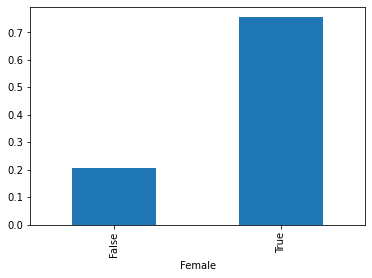

In [44]:
data.groupby('Female').Survived.mean().plot(kind='bar')

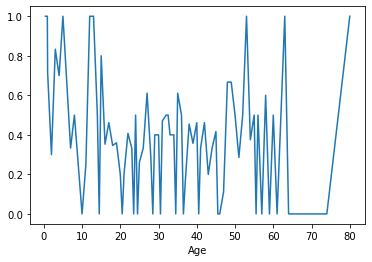

In [45]:
data.groupby('Age').Survived.mean().plot(kind='line')

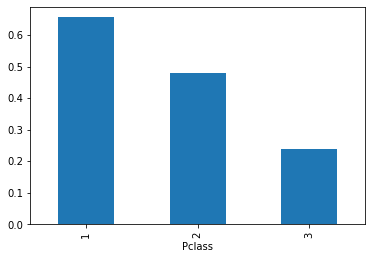

In [46]:
data.groupby('Pclass').Survived.mean().plot(kind='bar') #people in Pclass that survived

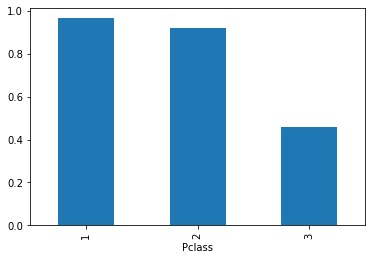

In [47]:
data.query('Female == True').groupby('Pclass').Survived.mean().plot(kind='bar') #people in first class and female that survived

In [ ]:
# We compute a few histograms.
bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[survived & female],
                            bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[~survived & female],
                            bins=bins_)[0]}

In [ ]:
# We now plot the data.
bins = bins_[:-1]
fig, axes = plt.subplots(1, 2, figsize=(10, 3),
                         sharey=True)
for ax, sex, color in zip(axes, ('male', 'female'),
                          ('#3345d0', '#cc3dc0')):
    ax.bar(bins, S[sex], bottom=D[sex], color=color,
           width=5, label='survived')
    ax.bar(bins, D[sex], color='k',
           width=5, label='died')
    ax.set_xlim(0, 80)
    ax.set_xlabel("Age (years)")
    ax.set_title(sex + " survival")
    ax.grid(None)
    ax.legend()

### Data Splitting

In [48]:
# We split X and y into train and test datasets
# Spliting into 95% for training set and 5% for testing set
(X_train, X_test, y_train, y_test) = \
    ms.train_test_split(X, y, test_size=.05, random_state=0) 

## Training a Logistic Regression Model

In [49]:
import sklearn.linear_model as lm
import sklearn.model_selection as ms

In [50]:
logreg = lm.LogisticRegression() #instantiate the classifier.

In [51]:
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

In [52]:
result = logreg.score(X_test, y_test)
print(result)

0.9444444444444444


### Cross Validation

In [54]:
ms.cross_val_score(logreg, X, y, cv=5)

array([0.76923077, 0.83216783, 0.77622378, 0.74825175, 0.8028169 ])

In [56]:
grid = ms.GridSearchCV(
    logreg, {'C': np.logspace(-5, 5, 200)}, n_jobs=4)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.046595256686646824}

In [57]:
scores = ms.cross_val_score(grid.best_estimator_, X, y, cv=5)

In [58]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.80 accuracy with a standard deviation of 0.04


### Saving Models 

In [59]:
import pickle

In [60]:
# save the model to disk
filename = 'final_logreg_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

## Training an SVM Model

In [61]:
import sklearn.svm as svm

In [62]:
# Declaring the SVC with no tunning
classifier = svm.SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

# Predicting the result and giving the accuracy
score = classifier.score(X_test, y_test)

print(score)

0.7222222222222222


In [63]:
# save the model to disk
filename = 'svm_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

### Cross Validation

In [64]:
scores = ms.cross_val_score(classifier, X, y, cv=5)

In [65]:
scores

array([0.60839161, 0.6013986 , 0.63636364, 0.61538462, 0.64084507])

In [66]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.62 accuracy with a standard deviation of 0.02


## Model Assessment Metrics

In [67]:
from sklearn import metrics

In [68]:
sklearn.metrics.SCORERS.keys() #get dictionary keys of all available scores

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [69]:
f1_score = ms.cross_val_score(classifier, X, y, cv=5, scoring='f1')

In [70]:
print("%0.2f F1-score with a standard deviation of %0.2f" % (f1_score.mean(), f1_score.std()))

0.21 F1-score with a standard deviation of 0.05


In [71]:
precision_score = ms.cross_val_score(classifier, X, y, cv=5, scoring='precision')

In [72]:
print("%0.2f precision with a standard deviation of %0.2f" % (precision_score.mean(), precision_score.std()))

0.70 precision with a standard deviation of 0.11


In [73]:
recall_score = ms.cross_val_score(classifier, X, y, cv=5, scoring='recall')

In [74]:
print("%0.2f recall with a standard deviation of %0.2f" % (recall_score.mean(), recall_score.std()))

0.12 recall with a standard deviation of 0.04


### Loading Models 

In [75]:
filename = 'final_logreg_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9444444444444444


In [76]:
filename = 'svm_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7222222222222222


## Summary of Lessons Learned

Machine Learning with Sklearn including:

- Sklearn (installation, model training and model assessment)  
- Data Processing 
    - inspection, manipulation, splitting, transformation and visualization 
- Feature Selection & Extraction
- Model Training with Logistic Regression and SVMs
- Model Assessment 
- Cross Validation
- Saving and Loading Models

## Techncial Exercise
- Available on Moodle Today
- Due Date: midnight (23:59) on 28th of October 2022. 

## Further Resources

This notebook is mostly based on lectures from [IPython Cookbook, Second Edition (2018)](https://ipython-books.github.io/)

The following links provide further documentation for the topics discussed in this notebook. 

- [Scikit-learn](https://scikit-learn.org/stable/index.html)

- [Scikit Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- [Scikit SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

- [Scikit Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

- [Scikit Metrics and Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

- [Kaggle SVM Titanic Model](https://www.kaggle.com/code/eltonpaes/titanic-survivals-with-svm)

